In [1]:
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [44.8 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
!apt-get install openjdk-8-jdk-headless
!wget  https://mirrors.estointernet.in/apache/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 18 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u275-b01-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u275-b01-0ubuntu1~18.04 [8,269 kB]
Fetched 36.5 MB in 3s (13.9 MB/s)
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database

In [ ]:
!ls

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pyspark.sql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from pyspark.sql.functions import count
import seaborn as sns
from pyspark.sql import functions as F
from sklearn import metrics

In [ ]:
spark = SparkSession.builder.getOrCreate()

In [1]:
! pip install -q kaggle

In [2]:
 ! mkdir ~/.kaggle

In [3]:
%cd /content

/content


In [ ]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                       title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                           6MB  2021-02-08 06:30:55            405  
aagghh/crypto-telegram-groups                             Crypto telegram groups                              297MB  2021-02-02 09:58:25             74  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020                    16KB  2021-01-30 14:20:45            264  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                               1MB  2021-01-29 13:53:50             65  
timoboz/superbowl-history-1967-2020                       Superbowl History 

In [7]:
! kaggle competitions download -c 'Expedia-Hotel-Recommendations'

  0% 0.00/5.67M [00:00<?, ?B/s]
100% 5.67M/5.67M [00:00<00:00, 92.3MB/s]
 46% 9.00M/19.5M [00:00<00:00, 38.3MB/s]
100% 19.5M/19.5M [00:00<00:00, 56.0MB/s]
 74% 57.0M/77.4M [00:00<00:00, 58.2MB/s]
100% 77.4M/77.4M [00:00<00:00, 122MB/s] 
 99% 579M/584M [00:05<00:00, 138MB/s]
100% 584M/584M [00:05<00:00, 104MB/s]


In [8]:
!mkdir Dataset

In [9]:
!unzip test.csv.zip  -d Dataset
!unzip train.csv.zip -d Dataset
!unzip sample_submission.csv.zip -d Dataset
!unzip destinations.csv.zip -d Dataset

Archive:  test.csv.zip
  inflating: Dataset/test.csv        
Archive:  train.csv.zip
  inflating: Dataset/train.csv       
Archive:  sample_submission.csv.zip
  inflating: Dataset/sample_submission.csv  
Archive:  destinations.csv.zip
  inflating: Dataset/destinations.csv  


In [10]:
%cd Dataset/

/content/Dataset


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(color_codes=True)

In [ ]:
def string_to_datetime(s,fmt='%Y-%m-%d'):
  year,month,day=s.split('-')
  try:
    d=pd.datetime(int(year),int(month),int(day))
  except ValueError:
    d=pd.datetime(2017,1,1)
  d=min([max([d,pd.datetime(2013,1,1)]),pd.datetime(2017,1,1)])
  return d

In [ ]:
train = pd.read_csv('train.csv',usecols=['date_time','is_booking','srch_ci','srch_co'],parse_dates=['date_time'])
train['srch_ci']=train['srch_ci'].apply(string_to_datetime)
train['srch_co']=train['srch_co'].apply(string_to_datetime)
train.info()
train_bookings=train[train['is_booking']==1].drop('is_booking',axis=1)

test_bookings=pd.read_csv('test.csv',usecols=['date_time','srch_ci','srch_co'],parse_dates=['date_time'])
test_bookings['srch_ci']=test_bookings['srch_ci'].apply(string_to_datetime)
test_bookings['srch_co']=test_bookings['srch_co'].apply(string_to_datetime)
train.info()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date_time   datetime64[ns]
 1   srch_ci     datetime64[ns]
 2   srch_co     datetime64[ns]
 3   is_booking  int64         
dtypes: datetime64[ns](3), int64(1)
memory usage: 1.1 GB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date_time   datetime64[ns]
 1   srch_ci     datetime64[ns]
 2   srch_co     datetime64[ns]
 3   is_booking  int64         
dtypes: datetime64[ns](3), int64(1)
memory usage: 1.1 GB


In [ ]:
train_clicks=train[train['is_booking']==0].drop('is_booking',axis=1)

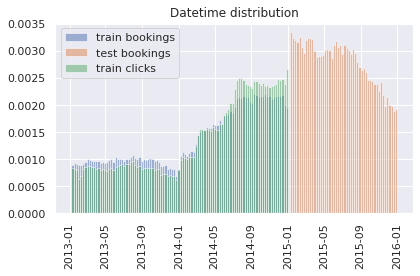

In [ ]:
f= plt.figure()
plt.hist(train_bookings['date_time'].values,bins=100,density=True,alpha=0.5,label='train bookings')
plt.hist(test_bookings['date_time'].values,bins=50,alpha=0.5,density=True,label='test bookings')
plt.hist(train_clicks['date_time'].values,bins=100,alpha=0.5,label='train clicks',density=True)
plt.title('Datetime distribution')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


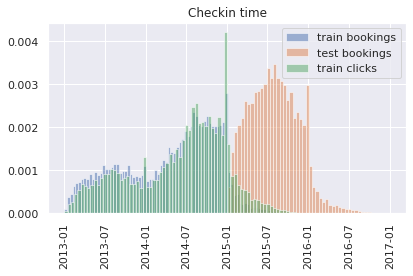

In [ ]:
f= plt.figure()
plt.hist(train_bookings['srch_ci'].values,bins=100,density=True,alpha=0.5,label='train bookings')
plt.hist(test_bookings['srch_ci'].values,bins=50,alpha=0.5,density=True,label='test bookings')
plt.hist(train_clicks['srch_ci'].values,bins=100,alpha=0.5,label='train clicks',density=True)
plt.title('Checkin time')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

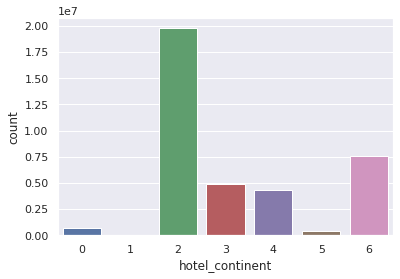

In [ ]:
df=pd.read_csv('train.csv',usecols=['hotel_continent'])
sns.countplot(x='hotel_continent',data=df)

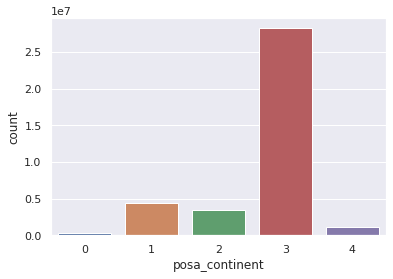

In [ ]:
df=pd.read_csv('train.csv',usecols=['posa_continent'])
sns.countplot(x='posa_continent',data=df)

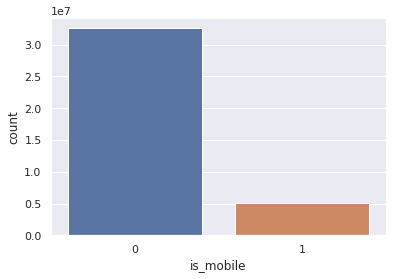

In [ ]:
df=pd.read_csv('train.csv',usecols=['is_mobile'])
sns.countplot(x='is_mobile',data=df)

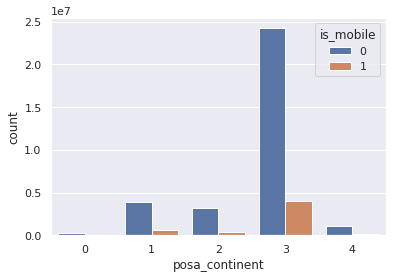

In [ ]:
df=pd.read_csv('train.csv',usecols=['is_mobile','posa_continent'])
sns.countplot(x='posa_continent',hue='is_mobile',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


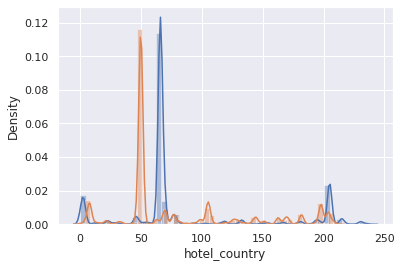

In [ ]:
df=pd.read_csv('train.csv',usecols=['user_location_country','hotel_country'])
sns.distplot(df['user_location_country'], label="User country")
sns.distplot(df['hotel_country'], label="Hotel country")

In [ ]:
from pandas import concat

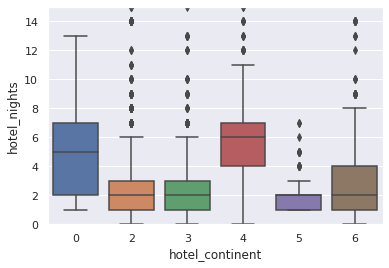

In [ ]:
df=pd.read_csv('train.csv',parse_dates=['srch_co','srch_ci'],nrows=10000)
hotel_nights=df['srch_co']-df['srch_ci']
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float)
df['hotel_nights']=hotel_nights
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=df)
lim = ax.set(ylim=(0, 15))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


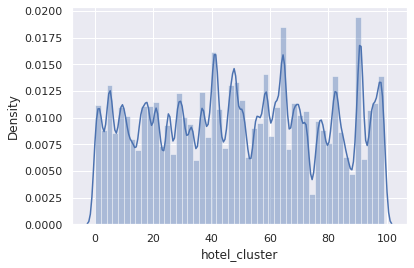

In [14]:
df=pd.read_csv('train.csv',usecols=['hotel_cluster'])
sns.distplot(df['hotel_cluster'])